# Principla Componet Analysis

Steps to calculate PCA are explained and shown downn below:

In [ ]:
install.packages("GGally")

In [ ]:
head(longley)# use a pre available dataset from R
summary(longley)

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221
1952,98.1,346.999,193.2,359.4,113.270,1952,63.639


  GNP.deflator         GNP          Unemployed     Armed.Forces  
 Min.   : 83.00   Min.   :234.3   Min.   :187.0   Min.   :145.6  
 1st Qu.: 94.53   1st Qu.:317.9   1st Qu.:234.8   1st Qu.:229.8  
 Median :100.60   Median :381.4   Median :314.4   Median :271.8  
 Mean   :101.68   Mean   :387.7   Mean   :319.3   Mean   :260.7  
 3rd Qu.:111.25   3rd Qu.:454.1   3rd Qu.:384.2   3rd Qu.:306.1  
 Max.   :116.90   Max.   :554.9   Max.   :480.6   Max.   :359.4  
   Population         Year         Employed    
 Min.   :107.6   Min.   :1947   Min.   :60.17  
 1st Qu.:111.8   1st Qu.:1951   1st Qu.:62.71  
 Median :116.8   Median :1954   Median :65.50  
 Mean   :117.4   Mean   :1954   Mean   :65.32  
 3rd Qu.:122.3   3rd Qu.:1958   3rd Qu.:68.29  
 Max.   :130.1   Max.   :1962   Max.   :70.55  

In [ ]:
data_set <- longley[,-c(6,7)] #keeping only required columns also knows as features
head(data_set)


,GNP.deflator,GNP,Unemployed,Armed.Forces,Population
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1947,83.0,234.289,235.6,159.0,107.608
1948,88.5,259.426,232.5,145.6,108.632
1949,88.2,258.054,368.2,161.6,109.773
1950,89.5,284.599,335.1,165.0,110.929
1951,96.2,328.975,209.9,309.9,112.075
1952,98.1,346.999,193.2,359.4,113.270


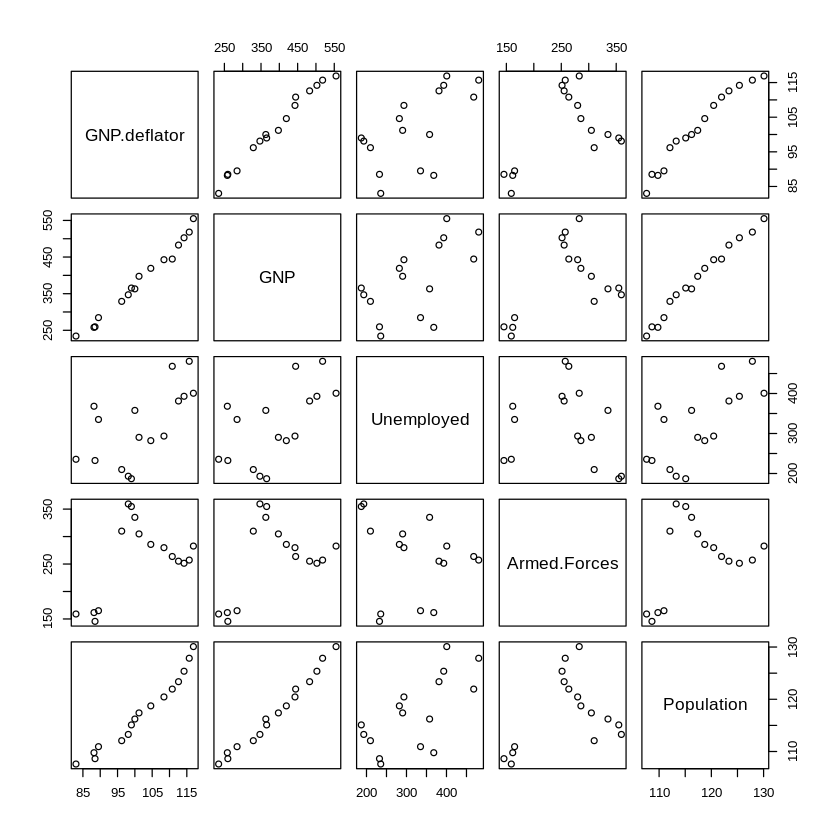

In [ ]:
pairs(data_set) # Just to check the relationship withing different features

In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape’




# To find PCA in detailed without direct python provided direct PCA calculating functions

In [ ]:
data_matrix = matrix(c(data_set$GNP.deflator,data_set$GNP,data_set$Unemployed,data_set$Armed.Forces,data_set$Population),ncol = 5)
data_matrix
#t(data_matrix)

83.0,234.289,235.6,159.0,107.608
88.5,259.426,232.5,145.6,108.632
88.2,258.054,368.2,161.6,109.773
89.5,284.599,335.1,165.0,110.929
96.2,328.975,209.9,309.9,112.075
98.1,346.999,193.2,359.4,113.270
99.0,365.385,187.0,354.7,115.094
100.0,363.112,357.8,335.0,116.219
101.2,397.469,290.4,304.8,117.388
104.6,419.180,282.2,285.7,118.734
108.4,442.769,293.6,279.8,120.445


### Step 1 - Center the data points (subtract the mean of each attribute from the corresponding coordinate.)

In [ ]:
means_of_features = colMeans(data_matrix)
means_of_features

[1] 101.6813 387.6984 319.3313 260.6687 117.4240

In [ ]:
mean_deviation_form = data_matrix - means_of_features #OPTION 1
mean_deviation_form

-18.68125,-153.40944,-83.73125,-101.66875,-9.81600
-299.19844,-59.90525,-28.16875,28.17600,6.95075
-231.13125,-2.61475,250.77600,59.91875,-277.92544
-171.16875,167.17500,233.41875,-222.69844,-208.40225
-21.22400,227.29375,-177.79844,-9.43125,-148.59375
-3.58125,-40.69944,-126.13125,98.73125,-4.15400
-288.69844,46.05375,-73.66875,237.27600,13.41275
-219.33125,102.44325,240.37600,233.31875,-271.47944
-159.46875,280.04500,188.71875,-82.89844,-201.94325
-12.82400,317.49875,-105.49844,-33.63125,-141.93475
6.71875,55.07056,-25.73125,19.13125,3.02100


In [ ]:
#OPTION 2 - to calculate means deviation matrix directly
mean_deviation_form2 = sweep(data_matrix,1,means_of_features);
mean_deviation_form2

Warning message in sweep(data_matrix, 1, means_of_features):
“STATS does not recycle exactly across MARGIN”


-18.68125,-153.40944,-83.73125,-101.66875,-9.81600
-299.19844,-59.90525,-28.16875,28.17600,6.95075
-231.13125,-2.61475,250.77600,59.91875,-277.92544
-171.16875,167.17500,233.41875,-222.69844,-208.40225
-21.22400,227.29375,-177.79844,-9.43125,-148.59375
-3.58125,-40.69944,-126.13125,98.73125,-4.15400
-288.69844,46.05375,-73.66875,237.27600,13.41275
-219.33125,102.44325,240.37600,233.31875,-271.47944
-159.46875,280.04500,188.71875,-82.89844,-201.94325
-12.82400,317.49875,-105.49844,-33.63125,-141.93475
6.71875,55.07056,-25.73125,19.13125,3.02100


### Step2 - Covariance matrix
It main diagonal shows the main varience of data. The covariance matrix is symmetric.

In [ ]:
# Sample covarinec matrix 
x = t(mean_deviation_form2) %*% mean_deviation_form2  #use the transpose matrix 1st in multiplication
Sample_cov_M = 1/(ncol(mean_deviation_form2)-1) * x
Sample_cov_M


117810.87,-57796.92,-74415.405,-35036.258,67190.473
-57796.92,179508.68,76474.299,-12484.896,-94834.383
-74415.40,76474.30,124036.978,3288.896,-78402.981
-35036.26,-12484.90,3288.896,65286.611,-2322.754
67190.47,-94834.38,-78402.981,-2322.754,100859.356


### Step 3 - Eigen values and vectors

In [ ]:
eigen(Sample_cov_M)

eigen() decomposition
$values
[1] 359641.36 114603.35  59698.77  29154.75  24404.28

$vectors
           [,1]        [,2]        [,3]      [,4]       [,5]
[1,]  0.4288160  0.57008089  0.14855216 0.5927794 -0.3430298
[2,] -0.5925495  0.57186765 -0.46959017 0.1567083  0.2770921
[3,] -0.4867571 -0.18153716  0.67632904 0.4783819  0.2093839
[4,] -0.0351051 -0.56053456 -0.54362586 0.5978953 -0.1776536
[5,]  0.4762741 -0.02864326 -0.06683773 0.1942348  0.8544870


In [ ]:
per_contri_varience = eigen(Sample_cov_M)$values/sum(eigen(Sample_cov_M)$values)
per_contri_varience

[1] 0.61215290 0.19506870 0.10161449 0.04962490 0.04153902

# Direct way to calculate PCA using python function (prcomp)

In [ ]:
library(stats)

In [ ]:
nPCA = prcomp(data_set,scale. = TRUE)
nPCA

Standard deviations (1, .., p=5):
[1] 1.89991292 1.08413093 0.44626826 0.12199281 0.03087773

Rotation (n x k) = (5 x 5):
                   PC1         PC2        PC3          PC4          PC5
GNP.deflator 0.5210129 -0.05808997  0.1889153  0.776958379  0.292946852
GNP          0.5199086 -0.05345522  0.3174971 -0.135947010 -0.779455948
Unemployed   0.3658062  0.59532321 -0.7100763  0.004614581 -0.086870665
Armed.Forces 0.2296424 -0.79831473 -0.5511572 -0.078584283 -0.002874243
Population   0.5212397  0.04529867  0.2356355 -0.609637027  0.546878225

In [ ]:
summary(nPCA)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5
Standard deviation     1.8999 1.0841 0.44627 0.12199 0.03088
Proportion of Variance 0.7219 0.2351 0.03983 0.00298 0.00019
Cumulative Proportion  0.7219 0.9570 0.99683 0.99981 1.00000